In [28]:
# importing libraries
import numpy as np
import cmath
import math
from matplotlib import pyplot as plt
import cv2
from scipy.signal.signaltools import wiener

Analog Filters

Output across C of series RC circuit

It acts as 1st order low pass filter


Text(0.5, 1.0, 'Phase Spectrum')

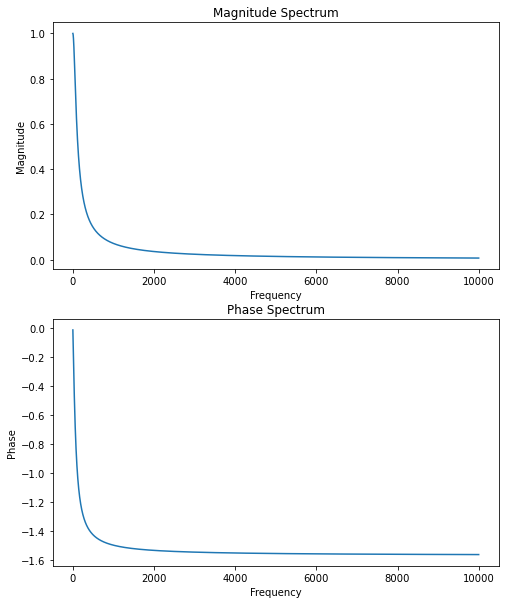

In [68]:
print("It acts as 1st order low pass filter")

f = np.arange(1,10000,0.1)
R = 47*np.power(10,3)
C = 47*(10**-9)

H_low = 1/(1+((1j)*(2*np.pi*R*C*f)))

mag_h = abs(H_low)
ph_h = np.angle(H_low)

fig = plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(f,mag_h)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(2,1,2)
plt.plot(f,ph_h)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

In [9]:
# For 100Hz frequency
f = 100
Xc = 1/(2*np.pi*f*C)
Vi = 10
Vo = (Xc/math.sqrt(Xc**2+R**2))*Vi
print("For 100Hz frequency and Vi=10V, the output voltage is "+str(Vo)+" V")

# For 10 kHz frequency
f = 10000
Xc = 1/(2*np.pi*f*C)
Vi = 10
Vo = (Xc/math.sqrt(Xc**2+R**2))*Vi
print("For 10 kHz frequency and Vi=10V, the output voltage is "+str(Vo)+" V")

# Cutoff frequency
fc = 1/(2*np.pi*R*C)
print("Cutoff frequency: "+str(fc)+" Hz")

For 100Hz frequency and Vi=10V, the output voltage is 5.845633851928551 V
For 10 kHz frequency and Vi=10V, the output voltage is 0.07204654251111998 V
Cutoff frequency: 72.04841244540305 Hz


From above, it can be inferred that the filter is a Low Pass Filter

Output Across R

It acts as high pass filter


Text(0.5, 1.0, 'Phase Spectrum')

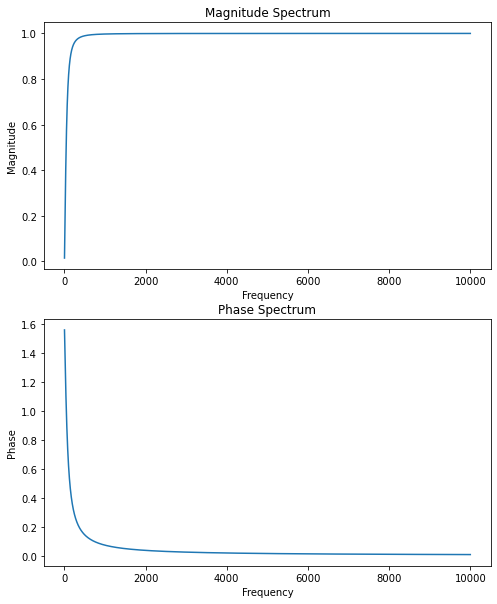

In [69]:
print("It acts as high pass filter")

f = np.arange(1,10000,0.1)
R = 47*np.power(10,3)
C = 47*(10**-9)

H_high = ((1j)*(2*np.pi*f*R*C))/(1+((1j)*(2*np.pi*R*C*f)))

mag_h = abs(H_high)
ph_h = np.angle(H_high)

fig = plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(f,mag_h)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(2,1,2)
plt.plot(f,ph_h)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

In [11]:
# For 100Hz frequency
f = 100
Xc = 1/(2*np.pi*f*C)
Vi = 10
Vo = (R/math.sqrt(Xc**2+R**2))*Vi
print("For 100Hz frequency and Vi=10V, the output voltage is "+str(Vo)+" V")

# For 10 kHz frequency
f = 10000
Xc = 1/(2*np.pi*f*C)
Vi = 10
Vo = (R/math.sqrt(Xc**2+R**2))*Vi
print("For 10 kHz frequency and Vi=10V, the output voltage is "+str(Vo)+" V")

# Cutoff frequency
fc = 1/(2*np.pi*R*C)
print("Cutoff frequency: "+str(fc)+" Hz")

For 100Hz frequency and Vi=10V, the output voltage is 8.11348044116623 V
For 10 kHz frequency and Vi=10V, the output voltage is 9.999740461417595 V
Cutoff frequency: 72.04841244540305 Hz


From above, it can be infered that the filter is a high pass filter

Second Order Low Pass Filter

Text(0.5, 1.0, 'Phase Spectrum')

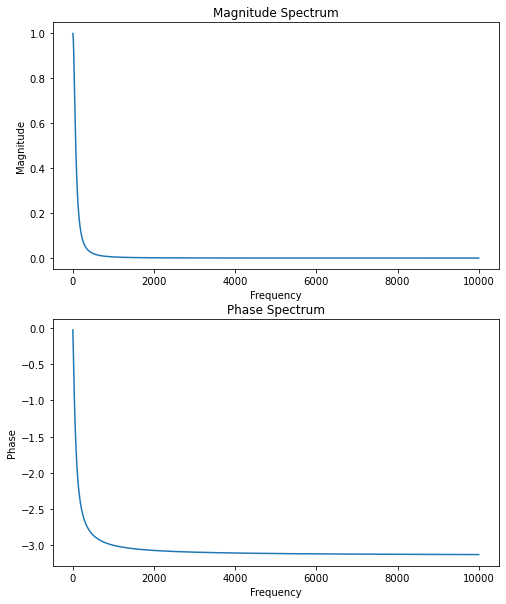

In [12]:
f = np.arange(1,10000,0.1)
R = 47*np.power(10,3)
C = 47*(10**-9)

H_low_2 = 1/((1-(40*np.power(R,2)*(C**2)*np.power(f,2))) + ((1j)*(4*np.pi*f*R*C)))

mag_h2 = abs(H_low_2)
ph_h2 = np.angle(H_low_2)

fig = plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(f,mag_h2)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(2,1,2)
plt.plot(f,ph_h2)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

Text(0.5, 1.0, 'Output Signal')

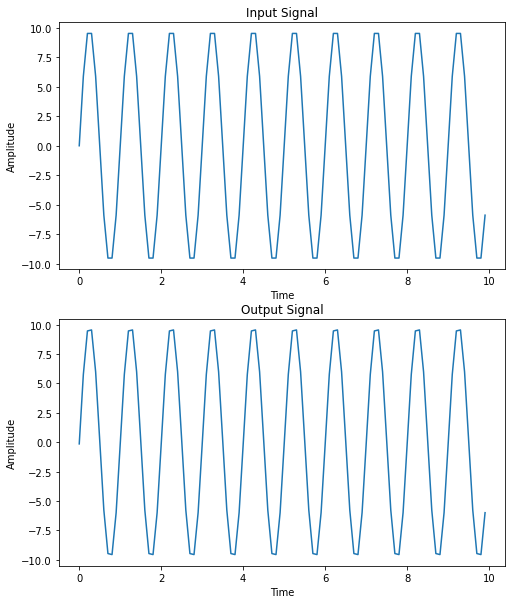

In [14]:
fs = 1
H_s = 1/(1+((1j)*(2*np.pi*R*C*fs)))
t = np.arange(0,10,0.1)
Vi = 10*np.sin(2*np.pi*t)

mag_s = abs(H_s)
ph_s = np.angle(H_s)

Vo = mag_s * 10 * np.sin((2*np.pi*t) + ph_s)

fig = plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(t,Vi)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')

plt.subplot(2,1,2)
plt.plot(t,Vo)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')

Bandpass Filter

Text(0.5, 1.0, 'Phase Spectrum')

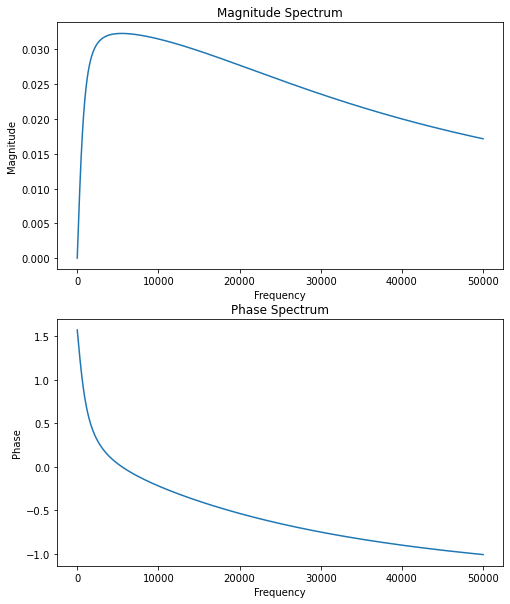

In [17]:
f = np.arange(1,50000,0.1)
fl = 1*np.power(10,3)
fh = 30*np.power(10,3)
R = 20*np.power(10,3)
C1 = 1/(2*np.pi*fl*R)
C2 = 1/(2*np.pi*fh*R)

H_low = 1/(1+((1j)*(2*np.pi*R*C1*f)))
H_high = ((1j)*(2*np.pi*f*R*C2))/(1+((1j)*(2*np.pi*R*C2*f)))
H_bp = H_low*H_high

mag_h = abs(H_bp)
ph_h = np.angle(H_bp)

fig = plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.plot(f,mag_h)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(2,1,2)
plt.plot(f,ph_h)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

Digital Filters

In [53]:
def delay(x,k):
    y = []
    for i in range(k):
        y.append(0)
    for i in range(k,len(x)):
        y.append(x[i-k])
    return y

The filter is called Low Pass Filter
The output of the system to the input x[n] is [ 1  3  5  7  9 11 13 15 17 19]


Text(0.5, 1.0, 'Output Signal')

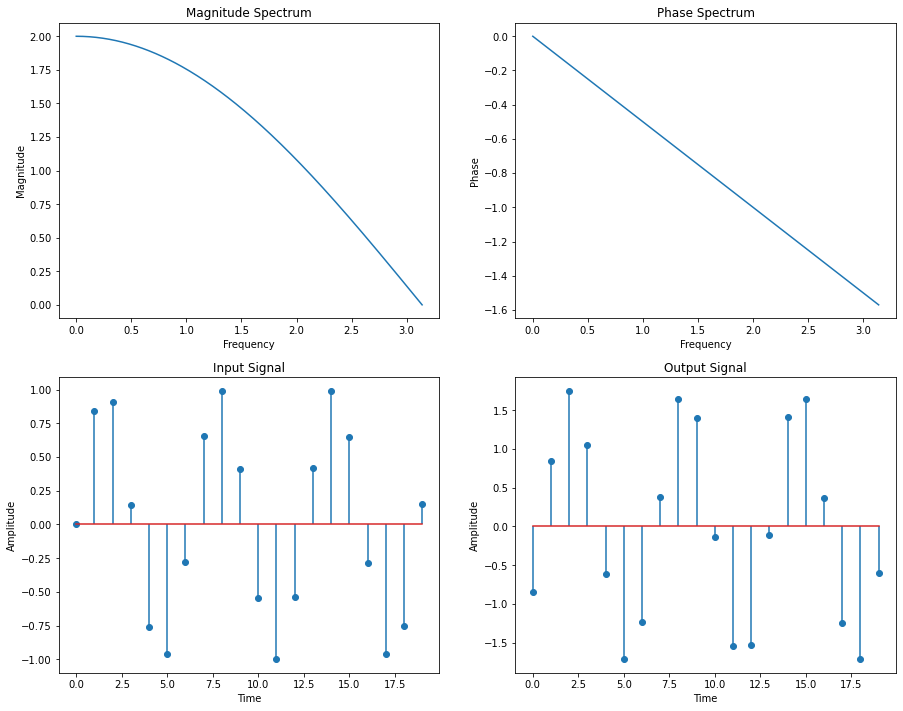

In [63]:
print("The filter is called Low Pass Filter")

x_n = np.array([1,2,3,4,5,6,7,8,9,10])

y_n = x_n + np.array(delay(x_n,1))

print("The output of the system to the input x[n] is "+str(y_n))

w = np.arange(0,np.pi,0.01)

H_w = (1+np.cos(w)) - ((1j)*np.sin(w))

mag_h = abs(H_w)
ph_h = np.angle(H_w)

fig = plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
plt.plot(w,mag_h)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(4,2,2)
plt.plot(w,ph_h)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

n = np.arange(0,20,1)
x_n = np.sin(n)

H_w = (1+np.cos(1)) - ((1j)*np.sin(1))

mag_h = abs(H_w)
ph_h = np.angle(H_w)

y_n = mag_h * np.sin(n+ph_h)

plt.subplot(4,2,3)
plt.stem(n,x_n)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')

plt.subplot(4,2,4)
plt.stem(n,y_n)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')

The filter is called Low Pass Moving Average Filter


Text(0.5, 1.0, 'Phase Spectrum')

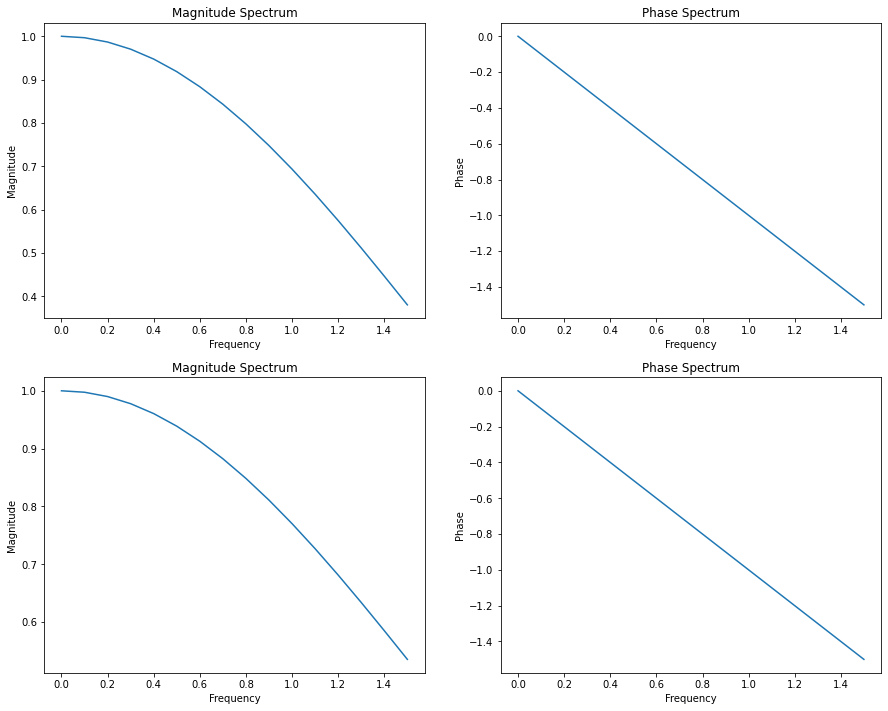

In [67]:
print("The filter is called Low Pass Moving Average Filter")

w = np.arange(0,np.pi/2,0.1)

H_w = (1/3) *((1+np.cos(w)+np.cos(2*w)) - ((1j)*(np.sin(w)+np.sin(2*w))))

mag_h = abs(H_w)
ph_h = np.angle(H_w)

fig = plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
plt.plot(w,mag_h)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(4,2,2)
plt.plot(w,ph_h)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

H_w2 = ((1/4) + ((1/2)*np.cos(w))+ ((1/4)*np.cos(2*w))) - ((1j)*(((1/2)*np.sin(w))+ ((1/4)*np.sin(2*w))))

mag_h2 = abs(H_w2)
ph_h2 = np.angle(H_w2)

plt.subplot(4,2,3)
plt.plot(w,mag_h2)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(4,2,4)
plt.plot(w,ph_h2)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum')

Mean and Median Filtering

Text(0.5, 1.0, 'Mean Filtered Image')

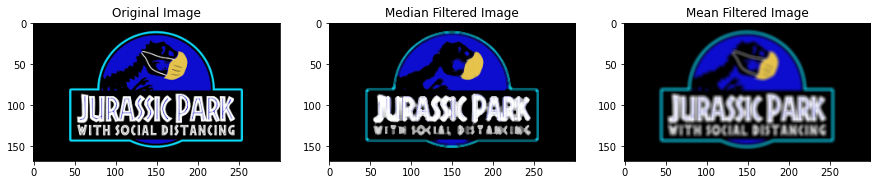

In [23]:
img = cv2.imread('jp.png')

img_med = cv2.medianBlur(img, 5)
img_mean = cv2.boxFilter(img,-1,(5,5), normalize = True)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(3,3,2)
plt.imshow(img_med)
plt.title("Median Filtered Image")

plt.subplot(3,3,3)
plt.imshow(img_mean)
plt.title("Mean Filtered Image")

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.8/site-packages/scipy/signal/signaltools.py:1598: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.8/site-packages/scipy/signal/signaltools.py:1598: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Speckle Noise Filtered Image')

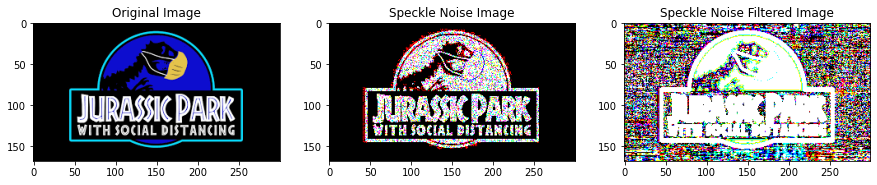

In [29]:
img = cv2.imread('jp.png')

# Speckle Noise
r,c,ch = img.shape
gauss = np.random.randn(r,c,ch)
gauss = gauss.reshape(r,c,ch)        
img_speckle = img + img * gauss

img_recon = wiener(img)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(3,3,2)
plt.imshow(img_speckle)
plt.title("Speckle Noise Image")

plt.subplot(3,3,3)
plt.imshow(img_recon)
plt.title("Speckle Noise Filtered Image")

Text(0.5, 1.0, 'Salt & Pepper Noise Filtered Image')

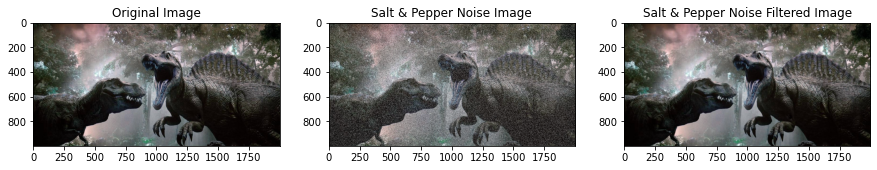

In [44]:
img = cv2.imread('jp1.jpg')

output = np.zeros(img.shape,np.uint8)
thres = 0.85
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        rdn = np.random.random()
        if rdn < 1-thres:
            output[i][j] = 0
        elif rdn > thres:
            output[i][j] = 255
        else:
            output[i][j] = img[i][j]
            
img_recon = cv2.medianBlur(img, 5)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(3,3,2)
plt.imshow(output)
plt.title("Salt & Pepper Noise Image")

plt.subplot(3,3,3)
plt.imshow(img_recon)
plt.title("Salt & Pepper Noise Filtered Image")

Analog to Digital Filters

 s = (2/T) * (z-1/z+1)

Text(0.5, 1.0, 'Phase Spectrum Band pass filter')

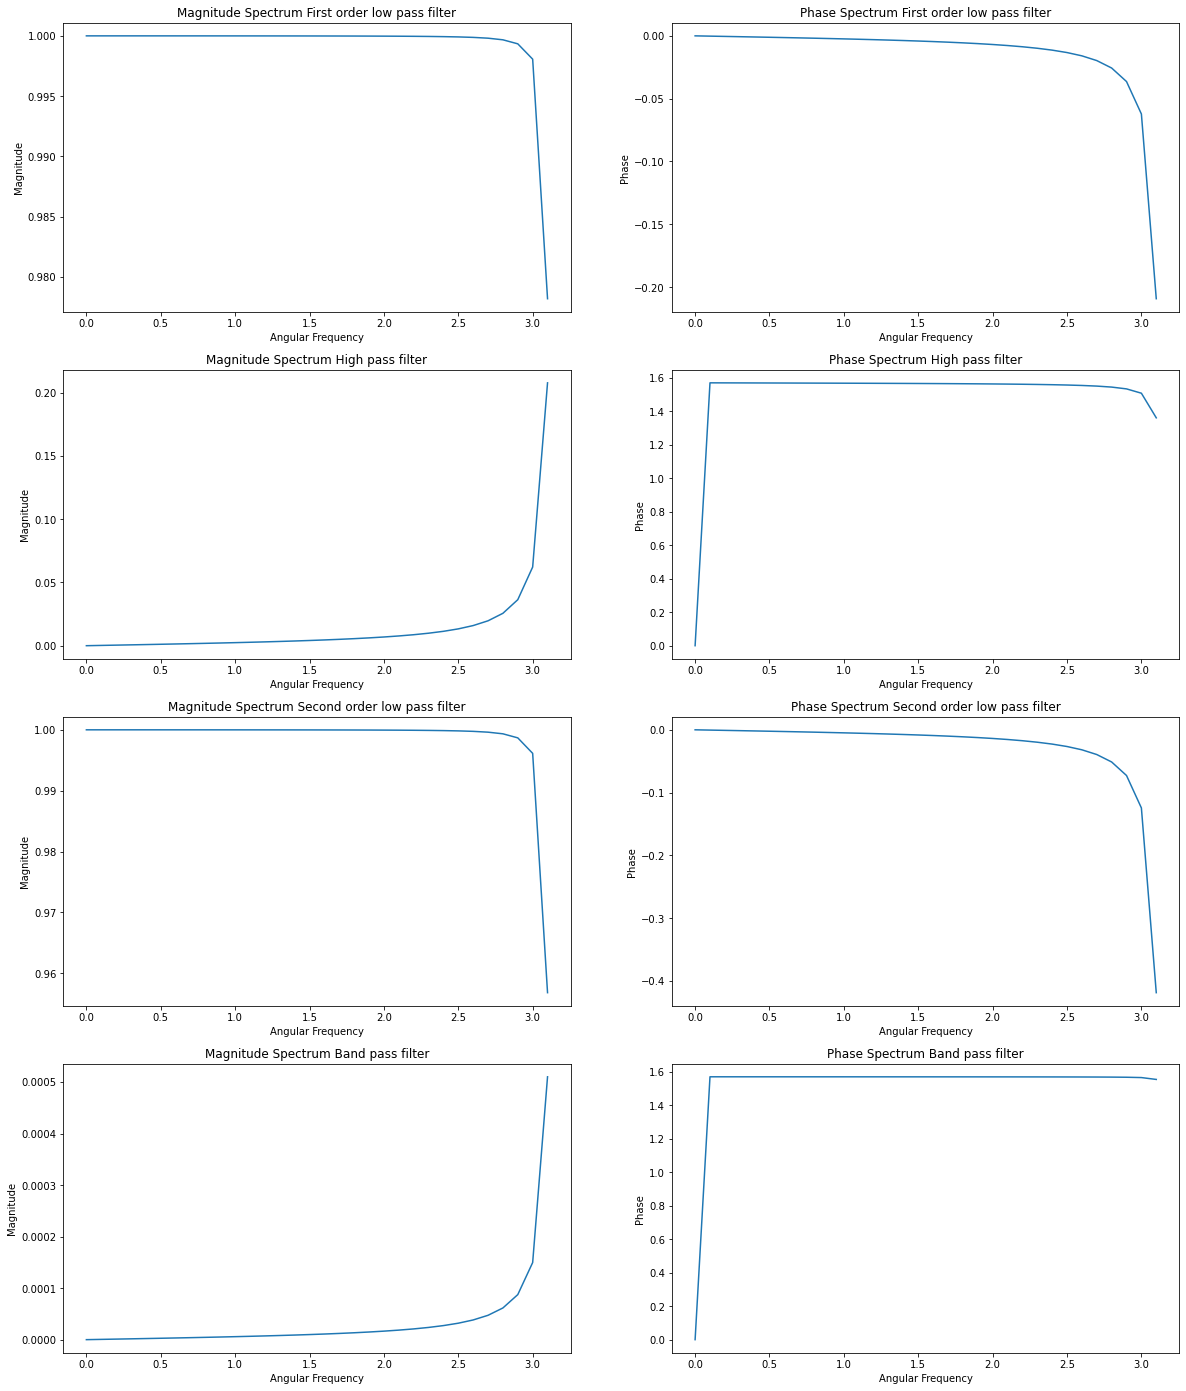

In [78]:
T=1
w = np.arange(0,np.pi,0.1)
R = 47*np.power(10,3)
C = 47*(10**-9)

s = (2/T) * ((np.exp((1j)*w)-1)/((np.exp((1j)*w))+1))

H_low1 = 1/(1+(s*R*C))

mag_hl1 = abs(H_low1)
ph_hl1 = np.angle(H_low1)

H_high = (s*R*C)/(1+(s*R*C))

mag_hh = abs(H_high)
ph_hh = np.angle(H_high)

H_low2 = H_low1 ** 2

mag_hl2 = abs(H_low2)
ph_hl2 = np.angle(H_low2)

fl = 1*np.power(10,3)
fh = 30*np.power(10,3)
R = 20*np.power(10,3)
C1 = 1/(2*np.pi*fl*R)
C2 = 1/(2*np.pi*fh*R)

H_low = 1/(1+(s*R*C1))
H_h = (s*R*C2)/(1+(s*R*C2))
H_bp = H_low * H_h

mag_hbp = abs(H_bp)
ph_hbp = np.angle(H_bp)

fig = plt.figure(figsize=(20,50))

plt.subplot(8,2,1)
plt.plot(w,mag_hl1)
plt.xlabel('Angular Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum First order low pass filter')

plt.subplot(8,2,2)
plt.plot(w,ph_hl1)
plt.xlabel('Angular Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum First order low pass filter')

plt.subplot(8,2,3)
plt.plot(w,mag_hh)
plt.xlabel('Angular Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum High pass filter')

plt.subplot(8,2,4)
plt.plot(w,ph_hh)
plt.xlabel('Angular Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum High pass filter')

plt.subplot(8,2,5)
plt.plot(w,mag_hl2)
plt.xlabel('Angular Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum Second order low pass filter')

plt.subplot(8,2,6)
plt.plot(w,ph_hl2)
plt.xlabel('Angular Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum Second order low pass filter')

plt.subplot(8,2,7)
plt.plot(w,mag_hbp)
plt.xlabel('Angular Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum Band pass filter')

plt.subplot(8,2,8)
plt.plot(w,ph_hbp)
plt.xlabel('Angular Frequency')
plt.ylabel('Phase')
plt.title('Phase Spectrum Band pass filter')